Name: Vijay Sambhe
Student Number: 18205615
Email: 18205615@studentmail.ul.ie

# Graded Online Lab 7

# Multi-Class Classification: Keras NN

In this weeks online lab, you will conduct the necessary preprocessing steps, and then define, train, and test the model on data using the Iris dataset.

Now, lets begin by loading some of the required packages:

In [210]:
import numpy as np

from pandas import read_csv
from sklearn import datasets

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import keras
from keras.models import Sequential
from keras.layers import Dense

from keras.utils import to_categorical
# Eithe Keras or Sklearn function can be used for one-hot encodong
from sklearn.preprocessing import OneHotEncoder

from sklearn.model_selection import train_test_split

### Load the Dataset
The Iris dataset is loaded as part of the SkLearn library. 

In [211]:
# Read data from file stored in the Keras Libarary definition
iris = datasets.load_iris()
X = iris.data
y = iris.target


In [212]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

- **A1** Printing the input features X and the outputs **y** to gain an indea of what the data looks like. 

In [213]:
### Answers A1

In [214]:
print(X.shape)
print(X)
#data has four features

(150, 4)
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.1 1.5 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6

In [215]:
print(y.shape)
print(y)
#the data is ordered as per target

(150,)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [216]:
# print the names of the four features
print(iris.feature_names)


['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [217]:
# print the values contained in the target
print(iris.target_names)

['setosa' 'versicolor' 'virginica']


#there are 
- 150 instances (rows)
- 4 features - 'sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)'
- Target or output has 3 classes - 'setosa' 'versicolor' 'virginica'

- **B1** Plot the input features in 3 dimensions with their colour indicating their labels
Three of the four input features should be plotted. Use the three features that show the most distinct clusters

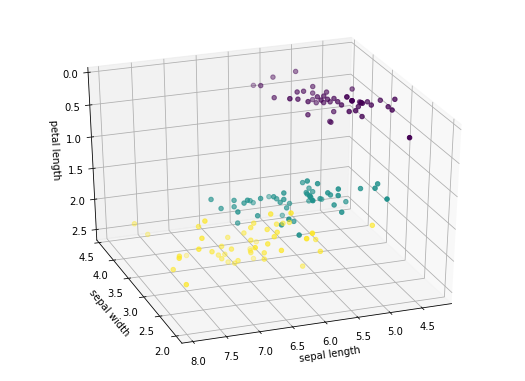

In [218]:
### Answers B1
fig = plt.figure(figsize=(7, 5));
ax=fig.add_subplot(111,projection='3d')

ax = Axes3D(fig, elev=-150, azim=110)

#three variables you think give the best separation between the clusters
#sepal length,sepal width,petal width
ax.scatter(X[:, 0], X[:, 1], X[:, 3], c=y, marker='o')
ax.set_xlabel('sepal length')
ax.set_ylabel('sepal width')
ax.set_zlabel('petal length')


plt.show()



In the plot colour of the points indicate the response class

# Data Distribution

- **C1** Plot the ditribution of each input feature using histograms

In [219]:
import pandas as pd
#using pandas to review the input feature distribution
data1 = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])

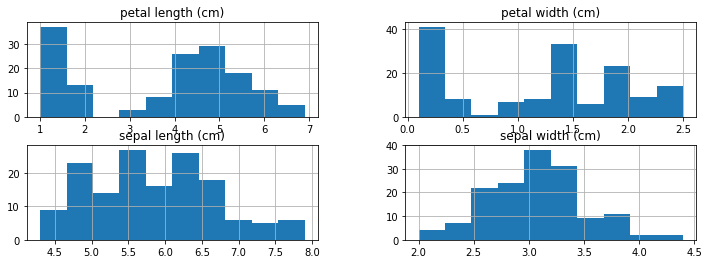

In [220]:
features = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
data1[features].hist(figsize=(12, 4));


C:\Anaconda3\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


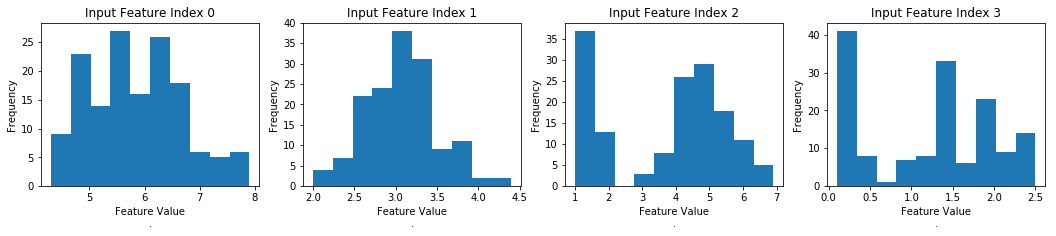

In [221]:
#Another way by using X- here the title is the feature index as X does not contain the column names

shape = X.shape

# Define a figure of width 18 and height 3 that is going
# to contain all of the scatter plots in subfigures.
f = plt.figure(figsize=(18,3))

# Makes plots appear closer together.
f.tight_layout()

# Looping over the index of all the input features (0 to 3 inclusinve)
for i in range(shape[1]):

    # Create a subplot ax and add it to the figure f. Expected to be
    # total_num_plots/4 rows of plots, 4 columns of plots. Plot indexed by i+1
    ax = f.add_subplot(int(shape[1]/4),4,i+1)
    
    # Format input features column from a row vector to a matrix with one column (needed for input to hist)
    x_hist_input = X[:,i].reshape(X.shape[0],1)
    
    # Plot a histogram for each input feature i. This hsitogram incorporates the data of that input feature
    # for all of the data samples. Bins is equal to the number of lines or chunks in the plot
    ax.hist(x_hist_input, bins = 10)
    
    # Set title for this subplot
    ax.set_title("Input Feature Index "+ str(i))
    
    # Set x label for this subplot
    ax.set_xlabel("Feature Value\n.")
    
    # Set y label for this subplot
    ax.set_ylabel("Frequency")
    
# Show overall figure (necessary if we are using a Python script insteat of IPYNB and want to view the plots).
f.show()

- **C2** Analyse each ditribution you plotted
- **C3** Should you scale/normalise your Data?
- **C4** Are there any outliers? If so, take appropriate measures.

In [222]:
### Answers:
# C2 - 
#index 2 and index 3 - There are seem to be outliers with petal length and petal width. They seem to have some correlation.
#index 0 and 1  - sepal length and sepal width seem to have normal distribution, they seem to have nice bell curve in the histogram


# C3 Answer: 
# Yes, it is needed to normalise the data as each feature values have different range of values in them 
# so it will help with the model performance

# C4 Answer:
# There are outliers with petal length and petal width. Possible to remove the iutliers or give them a common value

# Correlation

- **D1** Plot pair plots (2D plots with one feature on each axis) of every input feature against every other. Ensure you label the axis with the corresponding feature index

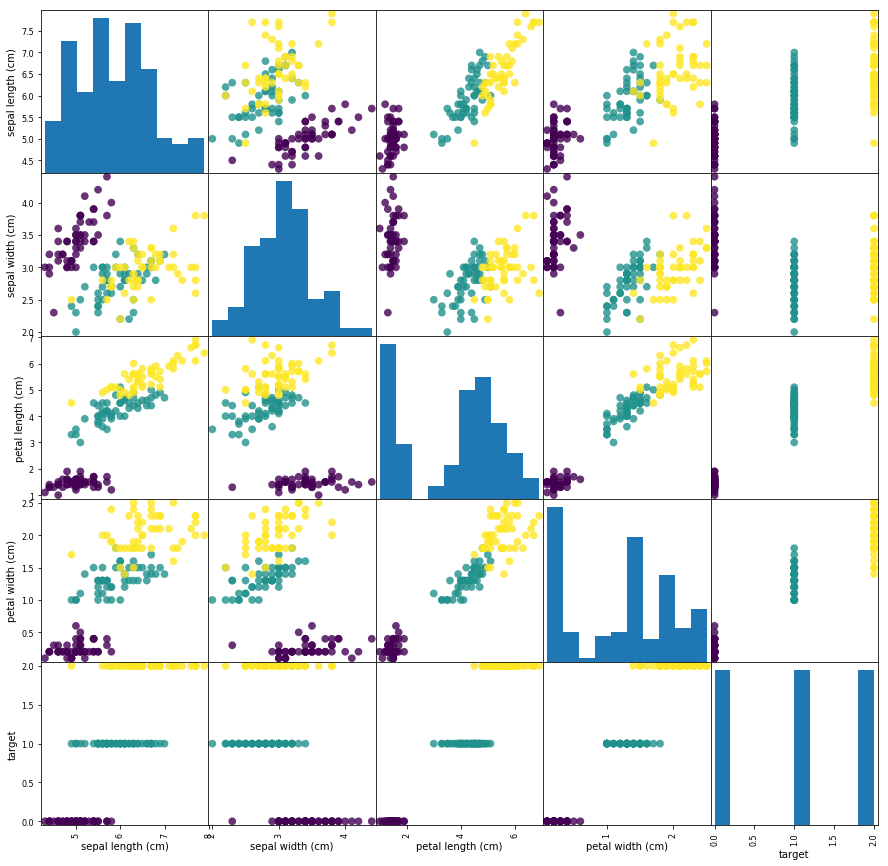

In [223]:
### Answers D1

#data = data1.drop(['target'], axis=1)
grr = pd.plotting.scatter_matrix(data1, c=y, figsize=(15, 15), marker='o',
                                 hist_kwds={'bins': 10}, s=60, alpha=.8)
plt.show()





- **D2** Observe the pair plots you generated. Are there any obvious correlations between any two input features?


In [224]:
### Answers:

# D2 Answer:
# The petal length and petal width have strongest coorrelation between them.

# From the pairplot, looks like Iris-setosa species (value 0) is separataed from the other
# two across all feature combinations

# The diagonal elements in a pairplot show the histogram by default

- **D4** Compute the correlation matrix for the set of input features

Covariance matrix:
 [[ 0.68569351 -0.03926846  1.27368233  0.5169038 ]
 [-0.03926846  0.18800403 -0.32171275 -0.11798121]
 [ 1.27368233 -0.32171275  3.11317942  1.29638747]
 [ 0.5169038  -0.11798121  1.29638747  0.58241432]]

Correlation matrix:
 [[ 1.         -0.10936925  0.87175416  0.81795363]
 [-0.10936925  1.         -0.4205161  -0.35654409]
 [ 0.87175416 -0.4205161   1.          0.9627571 ]
 [ 0.81795363 -0.35654409  0.9627571   1.        ]]


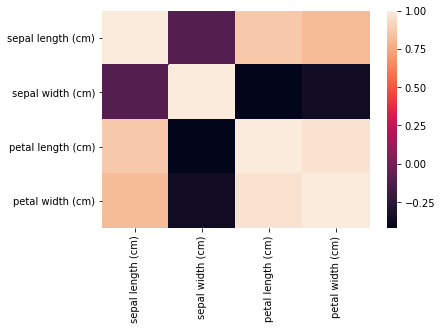

In [225]:
### Answer D4

# Create correlation matrix




# Required to set the datatype for input features when calculating the covariance matrix
X = X.astype(float)

print("Covariance matrix:\n", np.cov(X,rowvar=False))

# Create correlation matrix
corr_mat = np.corrcoef(X,rowvar=False)
print("\nCorrelation matrix:\n", corr_mat)

data = data1.drop(['target'], axis=1)

corr = data.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

- **D5** Analyse the correlation matrix.
- **D6** Does there exist correlated input features in your data?
- **D7** If so, list each pair of input feature indices that can be said to be strongly correlated
- **D8** From your above analysis of the correlation, should principal component analysis be performed?

In [226]:
### Answers:

# D5 Answer:
# Diagonal value of 1 shows that the features have highest correlation with themselves
# The highest value of 0.9627571 shows there is correlation between feature  2 and 3 (petal length and petal width)
# second best correlation is between petal length and sepal length
# the petal length and sepal width are completely noncorrelated (non linear)

# D6 Answer:
# Diagonal value of 1 shows that the features have highest correlation with themselves
# The highest value of 0.9627571 shows there is correlation between feature  2 and 3 (petal length and petal width)

# D7 Answer:
# 2 and 3 (petal length and petal width)

# D8 Answer:
# This dataset is not so huge in terms of features we could drop one of the column (either petal length or petal width) 
# from the data using pandas
# but yes instead we can use PCA to reduce the dimensions

## One-Hot Encoding

- **E1** Conduct one-hot encoding on your target variables **y**
- **E2** Ouput your results and check whether your one-hot encoder worked as expected

In [227]:
# One-hot encoding using SciKitLearn
from sklearn.preprocessing import LabelEncoder

# Transform the output from strings to integers 
# Declare an instance of the LabelEncoder
le = LabelEncoder()
# Fit the label encoder with the data we wish to encode
le.fit(y)

# Encode our output values using the label encoder
y_encoded = le.transform(y)
print(y_encoded)

#Transform our encoded labels back to their original string format just for an example on how to do so
le.inverse_transform(y_encoded)


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


C:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [228]:
### Answer E1:
# Can use Keras or SciKitlearn to do this step
y_encoded = to_categorical(y).astype(int)
### Answer E2:
print(y_encoded)

[[1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 

### Split data set into training and test datasets.
Now that our output **y** has been encoded, lets split our dataset into training and testing sets;

- **F1** Use train_test_split from the SkLearn library to split your input and output data into training and test datasets. Your training set should be 80% of your data and the test set the remaining samples. Set your random state to 42


In [229]:
### Answer F1:


X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)


# Scale the Data If Applicable

- **G1** Scale the relevant data if you determined that scaling was applicable. Ensure that you fit your scaling operator with the appropriate dataset

In [230]:
### Answer G1:

# Scale the data with respect to the training data set
scaler = StandardScaler()
scaler.fit(X_train)
X_scaled_train = scaler.transform(X_train)

# Scaling the test set using the transform defined by the train set.
X_scaled_test = scaler.transform(X_test)

# Principal Component Analysis (PCA) If Applicable

- **H1** Apply PCA if you deemed it applicable from your analysis of the correlation between features. Ensure you fit the PCA operator with the appropriate dataset. Transform both training and test sets.
- **H2** If you applied PCA, print the proportion of variance of each principal component

In [231]:
### Answer H1:
pca = PCA(n_components=4)
pca.fit(X_scaled_train)


### Answer H2:

# Output PCA variance results

print("Singular values = \n",pca.singular_values_)  
print("\nProportion of variance = \n",pca.explained_variance_ratio_)  


Singular values = 
 [18.63128819 10.55619591  4.3727144   1.52354752]

Proportion of variance = 
 [0.72317687 0.23215265 0.03983465 0.00483583]


- **H3** If you conducted PCA, from your results of the proportion of variance, decide upon the number of principle components to use
- **H4** If you conducted PCA, then set the variables X_PCA_train and X_PCA_test to include only these transformed principle components

In [232]:
### Answer H3:
# Will also accept 2 principle components as an answer

# number_of_PrincComp = 3

### Answer H4:
X_pca_train = pca.transform(X_scaled_train)
X_PCA_train = X_pca_train[:,:3]

X_pca_test = pca.transform(X_scaled_test)
X_PCA_test = X_pca_test[:,:3]



## Define Your Neural Network

- **I1** Define a neural network in the create_basic_nn function below, that will predict the relevant class of the Iris dataset.

For an explanation on the different types of loss functions see: https://ml-cheatsheet.readthedocs.io/en/latest/loss_functions.html and https://keras.io/losses/. 
For optimizers see: https://keras.io/optimizers/ and http://ruder.io/optimizing-gradient-descent/ (the latter link is very detailed but explains how each optimizer works very well).

In [237]:
### Some Answer I1:

def create_basic_nn(indim):
    model = Sequential()
    
    # Add layer
    model.add(Dense(indim, input_dim=indim, kernel_initializer='normal'))

    # Add RELU activation for this layer 
    model.add(keras.layers.Activation('relu'))
    model.add(Dense(100, kernel_initializer='normal',activation='relu'))   
    #model.add(Dense(8, kernel_initializer='normal',activation='relu'))  
    #model.add(Dense(4, kernel_initializer='normal',activation='relu')) 
    # We can add batch normalisation layer here if we desire
    #model.add(BatchNormalization())

    # Add output layer with sigmoid activation.
    model.add(Dense(3, kernel_initializer='normal', activation='sigmoid'))

    # Configures the model so that it can be trined and then used.
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

    return model



## Train and Fit

Now that the neural network model has been configured, it can be trained. This should be done on the training data for a specified number of epochs. Each epoch corresponds to one complete forward and backward propogation of the neural network (with the weights at each neuron being updated during back propogation).

It is important to view how the training performed. To do this it is desired to plot the training loss and training accuracy against its respective epoch, for all epochs.

- **J1** Define the function 'plot_loss_acc' so that it plots the training accuracy and training loss for every epoch using the return value from the training of the model as the expected argument


In [238]:
### Answer J1

# Define a function which plots training accuracy and loss across
# the different epochs.
def plot_loss_acc(history):
    # Plot loss
    plt.plot(history.history["loss"],label="Loss")
    # Plot Accuracy
    plt.plot(history.history["acc"],label="Accuracy")
    plt.legend()

    plt.show() 



- **J2** Declare an instance of your model using the function you previously defined
- **J3** Train your model using the number of epochs that you decide, using the appropriate data set
- **J4** Use the 'plot_loss_acc' function to plot your loss and accuracy across all the epochs
- **J5** Print the loss and accuracy for the final epoch of the model's training
- **J6** Evaluate your model using the test dataset. Print the accuracy and loss of the model for this evaluation

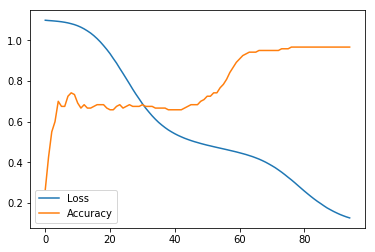

Final Training Accuracy:  0.9666666626930237
30/30 [==============================] - 1s 18ms/step
Test [Loss, Accuracy] =  [0.099504753947258, 1.0]


In [250]:
### Answer J2

# Define new model

model1 = create_basic_nn(X_PCA_train.shape[1])

### Answer J3
# Train the model
history_train_SCALED = model1.fit(X_PCA_train,y_train,verbose=0, epochs=95,batch_size=32)

### Answer J4
# Make Acc and Loss versus Epochs plot 
plot_loss_acc(history_train_SCALED)

### Answer J5
print("Final Training Accuracy: ",history_train_SCALED.history["acc"][94])


### Answer J6
print("Test [Loss, Accuracy] = ",model1.evaluate(X_PCA_test, y_test))




- **J7** Use your plot of the training accuracy and loss, your final training and your final testing loss and accuracy, and a comparison of the final training with your final testing loss and accuracy, to decide if your model performed well. Try to improve your model using these results to help guide you. Some things you might want to consider adjusting:
    - Loss function
    - Activation functions for the layers
    - Optimizer
    - Number of epochs
    - Number of layers
    - Number of nodes in each layer
    - Batch size


Your model should have a training and testing accuracy greater than 95%.


## Using Your Model to Predict Classes of Input Data

Finally, we would like to get output from our model given our inputted test data.

- **K1** Predict the labels of the appropriate test dataset using your finalised model
- **K2** Decode these predicted one-hot encoded outputs to their integer representation. Print your results

In [251]:
### Answer K1, K2
# Predict labels using the test data
encoded_labels = model1.predict_classes(X_PCA_test)
print("Model prediction: \n", encoded_labels)

# Decode the numeric results using the LabelEncoder 
decoded_labels = le.inverse_transform(encoded_labels)
print("\nModel prediction after decoding: \n", decoded_labels)

Model prediction: 
 [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0]

Model prediction after decoding: 
 [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0]


C:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
